In [68]:
from sklearn.cluster import HDBSCAN
import numpy as np
import pandas
import matplotlib.pyplot as plt
import os

dir_list = os.listdir('Primary Care Calibration\\Manually Validated Participants')
calList = pandas.read_excel('Primary Care Calibration\\Manually Validated Participants\\Calibration List.xlsx').to_numpy()

inds = np.zeros(len(dir_list)-1)
for i in range(len(dir_list)-1):
    if calList[i, 1]=='Good':
        inds[i] = 1

data = pandas.read_csv('Primary Care Calibration\\Manually Validated Participants\\' + str(dir_list[1])).to_numpy()

for l in range(len(data[:, 0])):
    if data[l, 4]<0 or data[l, 5]<0:
        data[l, 3] = 0
    else:
        if l != 0 and data[l, 4] == data[l-1, 4]:
            data[l, 3] = 0

validData = np.zeros(shape=(int(sum(data[:, 3])), 6))

j = 0
for k in range(len(data[:, 0])):
    if data[k, 3] == 1:
        validData[j, :] = data[k, :]
        j= j + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


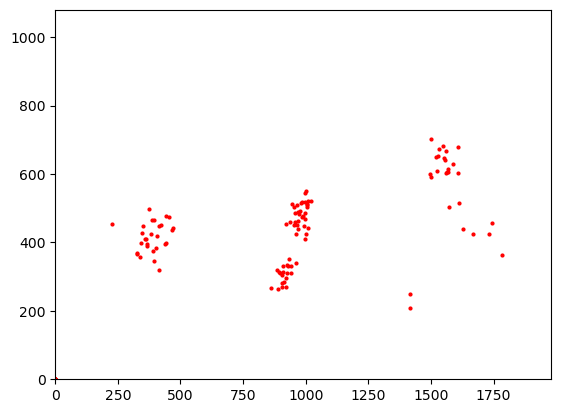

[[ 970.8133798   462.42249085]
 [1783.53941789  362.0085865 ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]]


In [ ]:
centroids = np.zeros(shape=(6, 2, int(sum(inds))))
m=0
for i in range(len(dir_list)-1):
    if inds[i]==1:
        data = pandas.read_csv('Primary Care Calibration\\Manually Validated Participants\\' + str(dir_list[i+1])).to_numpy()
        for l in range(len(data[:, 0])):
            if data[l, 4]<0 or data[l, 5]<0:
                data[l, 3] = 0
            else:
                if l != 0 and data[l, 4] == data[l-1, 4]:
                    data[l, 3] = 0

        validData = np.zeros(shape=(int(sum(data[:, 3])), 6))

        j = 0
        for k in range(len(data[:, 0])):
            if data[k, 3] == 1:
                validData[j, :] = data[k, :]
                j= j + 1

        temp = (HDBSCAN(min_cluster_size=70, store_centers='centroid').fit(validData[:, 4:]).centroids_)
        centroids[:len(temp), :, m] = temp
        m = m+1
    
for i in range(int(sum(inds))):
    plt.plot(centroids[:, 0, i], centroids[:, 1, i], 'o', markersize=2, color='r')
plt.xlim(0, 1980); plt.ylim(0, 1080)
plt.show()

24


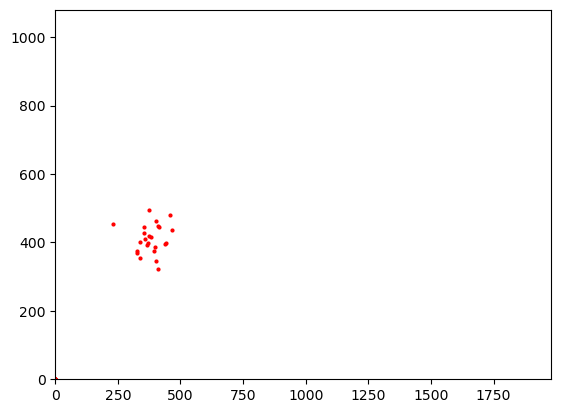

In [70]:
xmin = 0; xmax = 550
ymin = 200; ymax = 600

region = np.zeros(shape=(2, int(sum(inds))))

m = 0
for i in range(6):
    for j in range(int(sum(inds))):
        if xmin < centroids[i, 0, j] < xmax and ymin < centroids[i, 1, j] < ymax:
            region[:, m] = centroids[i, :, j]
            m = m + 1

print(np.where(region[0, :]==0)[0][0])
for i in range(int(sum(inds))):
    plt.plot(region[0, i], region[1, i], 'o', markersize=2, color='r')
plt.xlim(0, 1980); plt.ylim(0, 1080)
plt.show()

np.save('clusterData\\sidem_hdbscan', region)


20


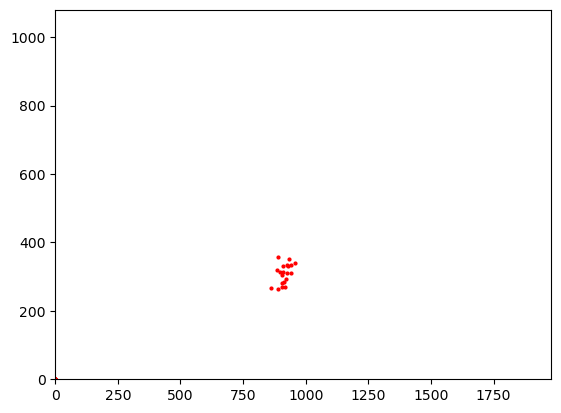

In [71]:
xmin = 820; xmax = 1000
ymin = 200; ymax = 370

region = np.zeros(shape=(2, int(sum(inds))))

m = 0
for i in range(6):
    for j in range(int(sum(inds))):
        if xmin < centroids[i, 0, j] < xmax and ymin < centroids[i, 1, j] < ymax:
            region[:, m] = centroids[i, :, j]
            m = m + 1

print(np.where(region[0, :]==0)[0][0])
for i in range(int(sum(inds))):
    plt.plot(region[0, i], region[1, i], 'o', markersize=2, color='r')
plt.xlim(0, 1980); plt.ylim(0, 1080)
plt.show()

np.save('clusterData\\speedom_hdbscan', region)


15


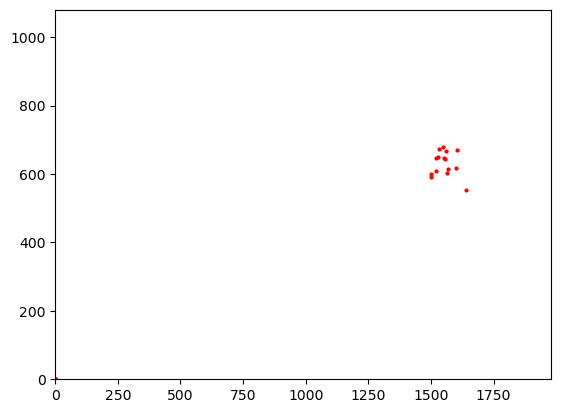

In [72]:
xmin = 1300; xmax = 1900
ymin = 540; ymax = 800

region = np.zeros(shape=(2, int(sum(inds))))

m = 0
for i in range(6):
    for j in range(int(sum(inds))):
        if xmin < centroids[i, 0, j] < xmax and ymin < centroids[i, 1, j] < ymax:
            region[:, m] = centroids[i, :, j]
            m = m + 1

print(np.where(region[0, :]==0)[0][0])
for i in range(int(sum(inds))):
    plt.plot(region[0, i], region[1, i], 'o', markersize=2, color='r')
plt.xlim(0, 1980); plt.ylim(0, 1080)
plt.show()

np.save('clusterData\\rv_hdbscan', region)


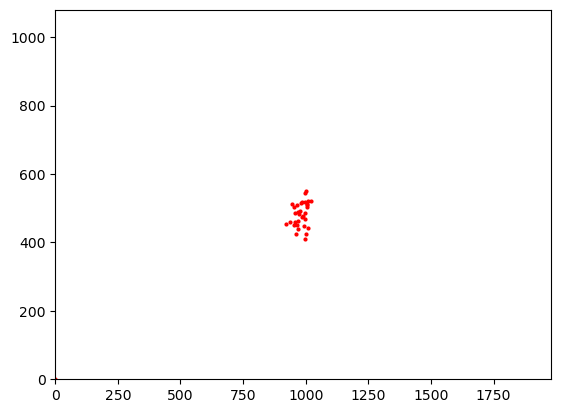

In [90]:
xmin = 600; xmax = 1050
ymin = 400; ymax = 550

region = np.zeros(shape=(2, int(sum(inds))))

m = 0
for i in range(6):
    for j in range(int(sum(inds))):
        if xmin < centroids[i, 0, j] < xmax and ymin < centroids[i, 1, j] < ymax:
            region[:, m] = centroids[i, :, j]
            m = m + 1

for i in range(int(sum(inds))):
    plt.plot(region[0, i], region[1, i], 'o', markersize=2, color='r')
plt.xlim(0, 1980); plt.ylim(0, 1080)
plt.show()

region[:, 33] = centroids[0, :, 33]

np.save('clusterData\\road_hdbscan', region)


2


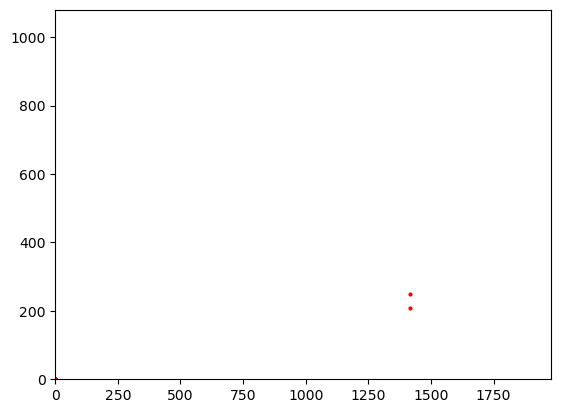

In [76]:
xmin = 1240; xmax = 1640
ymin = 50; ymax = 270
region = np.zeros(shape=(2, int(sum(inds))))

m = 0
for i in range(6):
    for j in range(int(sum(inds))):
        if xmin < centroids[i, 0, j] < xmax and ymin < centroids[i, 1, j] < ymax:
            region[:, m] = centroids[i, :, j]
            m = m + 1

print(np.where(region[0, :]==0)[0][0])
for i in range(int(sum(inds))):
    plt.plot(region[0, i], region[1, i], 'o', markersize=2, color='r')
plt.xlim(0, 1980); plt.ylim(0, 1080)
plt.show()

np.save('clusterData\\panel_hdbscan', region)
